In [6]:
import os.path as osp
import numpy as np
import numpy.linalg as npla
import scipy.spatial.transform as sptf
np.set_printoptions(6, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'font.size': 14,
})

from pylgmath import se3op

import utils


def load_dicp_pred_poses(filename):
    data = np.loadtxt(filename, delimiter=' ')

    poses = []
    for tq in data[:, 1:]:
        T_mr = np.eye(4)
        T_mr[:3, :3] = sptf.Rotation.from_quat(tq[3:]).as_matrix()
        T_mr[:3, 3] = tq[:3]
        poses.append(T_mr)
    return np.array(poses)


def load_steam_pred_poses(filename):
    data = np.loadtxt(filename)

    T_sr = se3op.vec2tran(np.array([[-1.42, -0.24, -1.37, 0.0, 0.0, 0.0]]).T)
    T_rs = npla.inv(T_sr)

    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_rs @ T_ms @ T_sr)

    return np.array(poses)


def load_gt_poses(filename):
    data = np.loadtxt(filename, delimiter=' ')

    poses = []
    for tq in data[:, 1:]:
        T_mr = np.eye(4)
        T_mr[:3, :3] = sptf.Rotation.from_quat(tq[3:]).as_matrix()
        T_mr[:3, 3] = tq[:3]
        poses.append(T_mr)
    return np.array(poses)


def plot_steam_pred_poses(ax, filename, gt_poses, label):
    pred_poses = load_steam_pred_poses(filename)
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 1, 3], label=label)


def plot_dicp_pred_poses(ax, filename, gt_poses, label):
    pred_poses = load_dicp_pred_poses(filename)
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 1, 3], label=label)


gt_path = '/media/yuchen/T7/ASRL/data/dicp'
pred_path = '/home/yuchen/ASRL/temp/doppler_odometry/dicp'
sequences = [
    'brisbane-lagoon-freeway',
    'bunker-road',
    'bunker-road-vehicles',
    'robin-williams-tunnel',
    'san-francisco-city',
]

In [7]:
sequence = sequences[0]

gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'ref_poses.txt'))[150:]

pred_file = 'elastic'
pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[150:]
t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry(gt_poses, pred_poses)
print(f"{pred_file} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f} \\\\")

pred_file = 'steam_0807_1'
pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[150:]
t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry(gt_poses, pred_poses)
print(f"{pred_file} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f} \\\\")

pred_file = 'steam_0807_1_rv'
pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[150:]
t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry(gt_poses, pred_poses)
print(f"{pred_file} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f} \\\\")

elastic & 1.09 & 0.0015 & 1.52 & 0.0037 \\
steam_0807_1 & 1.11 & 0.0012 & 1.53 & 0.0036 \\
steam_0807_1_rv & 1.24 & 0.0014 & 1.63 & 0.0037 \\


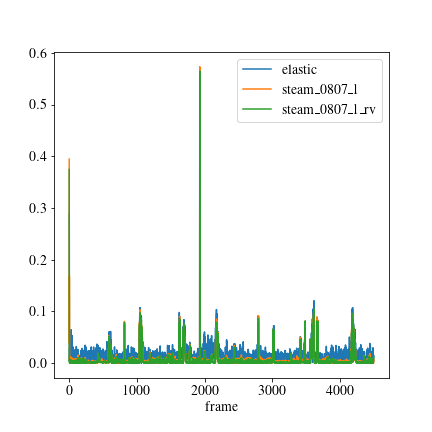

In [17]:
sequence = sequences[4]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

error_file = 'elastic'
error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
ax.plot(error, label=error_file)

error_file = 'steam_0807_1'
error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
ax.plot(error, label=error_file)

error_file = 'steam_0807_1_rv'
error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
ax.plot(error, label=error_file)

ax.set_xlabel('frame')
ax.legend()

plt.show()

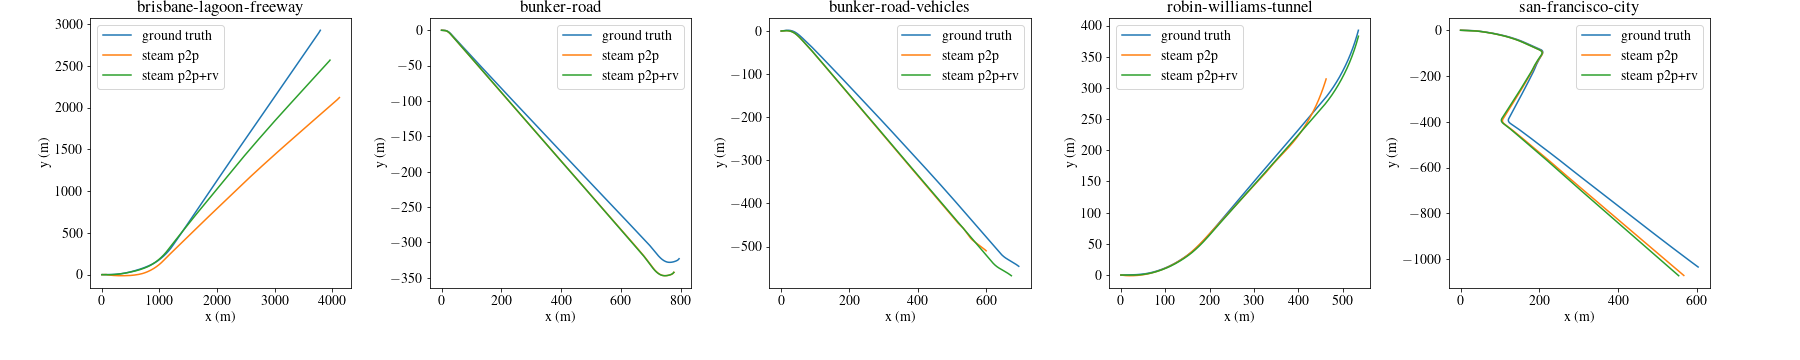

In [13]:
fig, axs = plt.subplots(1, len(sequences), figsize=(25, 5))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95, wspace=0.3, hspace=0.3)

for i, sequence in enumerate(sequences):
    ax = axs[i] if len(sequences) > 1 else axs

    gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'ref_poses.txt'))
    ax.plot(gt_poses[:, 0, 3], gt_poses[:, 1, 3], label='ground truth')

    pred_file = 'steam_0807_1'
    plot_steam_pred_poses(ax, osp.join(pred_path, pred_file, sequence+'_poses.txt'), gt_poses, 'steam p2p')

    pred_file = 'steam_0807_1_rv'
    plot_steam_pred_poses(ax, osp.join(pred_path, pred_file, sequence+'_poses.txt'), gt_poses, 'steam p2p+rv')

    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title(sequence)
    ax.legend()

plt.show()